# Business problems
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

* Which variables are significant in predicting the price of a house, and
* How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

# Business objectives
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Data preparation and cleansing
## Import neccessary packages

Although in Python we can import packages anywhere we want, as long as it's prior the use, it'd be better to keep all of neccessary packages in one place. It's easer for reference.

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# neccessary packages for data analysis
import numpy as np
import pandas as pd

# packages for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# packages for data partition and normalisation.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# package for linear regression
import statsmodels.api as sm

# package for detecting variance inflation factor. It's useful to detect overfiting.
from statsmodels.stats.outliers_influence import variance_inflation_factor

#package to calculate r2 score and mean squared error
from sklearn.metrics import r2_score, mean_squared_error

#packages to implement Lasso
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Exploratory Data Analysis
### Import dataset from current working folder 

In [2]:
raw_data = pd.read_csv("train.csv")

In [3]:
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Handling nulls value

Doing a quick check to see if there is any columns containing all null values.

In [5]:
(raw_data.isnull().sum() == len(raw_data)).sum()

0

It's great, there is no null columns. Now, let's take a closer look on each columns.

In [6]:
null = pd.DataFrame(round(raw_data.isnull().sum()/len(raw_data.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
# null.head()

null[null["Null %"] > 0]

,Null %
Features,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55


Following 5 top categorical variables have more than 50% 50% null data. They are removed since it's non-sense to impute or handling those columns.
* PoolQC
* MiscFeature
* Alley
* Fence
* FireplaceQu

In [7]:
## During programming, I may need to reserve the raw data. So all manipulated data will be created new data instead of update old data.
## data_v1 here is used to drop 5 top null columns
data_v1 = raw_data.drop(['PoolQC','MiscFeature', 'Alley','Fence','FireplaceQu'],axis=1)

In [8]:
null = pd.DataFrame(round(data_v1.isnull().sum()/len(data_v1.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null_df = null[null["Null %"] > 0]
null_df

,Null %
Features,
LotFrontage,17.74
GarageType,5.55
GarageCond,5.55
GarageYrBlt,5.55
GarageFinish,5.55
GarageQual,5.55
BsmtFinType2,2.60
BsmtExposure,2.60
BsmtFinType1,2.53


For categorical variables, missing values should be replaced by mode, while missing continuous variables should be replaced by median.

In [9]:
## for numeric variables, we impute using median
data_v1['LotFrontage'] = data_v1['LotFrontage'].fillna(data_v1['LotFrontage'].median())
data_v1['GarageYrBlt'] = data_v1['GarageYrBlt'].fillna(data_v1['GarageYrBlt'].median())

## for categorical variables, we use mode.
for col in ('GarageCond', 'GarageType', 'GarageFinish','GarageQual'
            , 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1','BsmtCond','BsmtQual'
            , 'MasVnrArea', 'MasVnrType', 'Electrical'
           ):
    
    data_v1[col] = data_v1[col].fillna(data_v1[col].mode()[0])

Quick check to ensure all missing values are handled properly.

In [10]:
null = pd.DataFrame(round(data_v1.isnull().sum()/len(data_v1.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null_df = null[null["Null %"] > 0]
null_df

,Null %
Features,


### Handling outliers

Extreme values, which are above 95% or below 5%, are considered outliers and should be removed before hand.

In [11]:
# Numeric columns
numeric_columns = data_v1.select_dtypes(exclude='object').columns

p05 = data_v1[numeric_columns].quantile(0.05)
p95 = data_v1[numeric_columns].quantile(0.95)

## calculating the range from p05 to p95
p05_95 = p95 - p05

## all data beyond that range are removed. 
## new dataset data_v2 is created to reserve data_v1
data_v2 = data_v1[~((data_v1[numeric_columns] < (p05 - 1.5 * p05_95)) |(data_v1[numeric_columns] > (p95 + 1.5 * p05_95))).any(axis=1)]

In [12]:
print("Shape of data before removing outliers: ", data_v1.shape)
print("Shape of data before removing outliers: ", data_v2.shape)

Shape of data before removing outliers:  (1460, 76)
Shape of data before removing outliers:  (1266, 76)


194 outliers raw are removed.

### Exploratory data analysis
#### Numeric variables

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [13]:
data_numeric = data_v2.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


According to data description, although variable MSSubClass is numeric, it looks like categorical. Also, variable ID is only for identification purpose, we can excluded ID variable from the dataset.

In [14]:
# dropping Id and Id 
data_numeric = data_numeric.drop(['MSSubClass','Id'], axis=1)

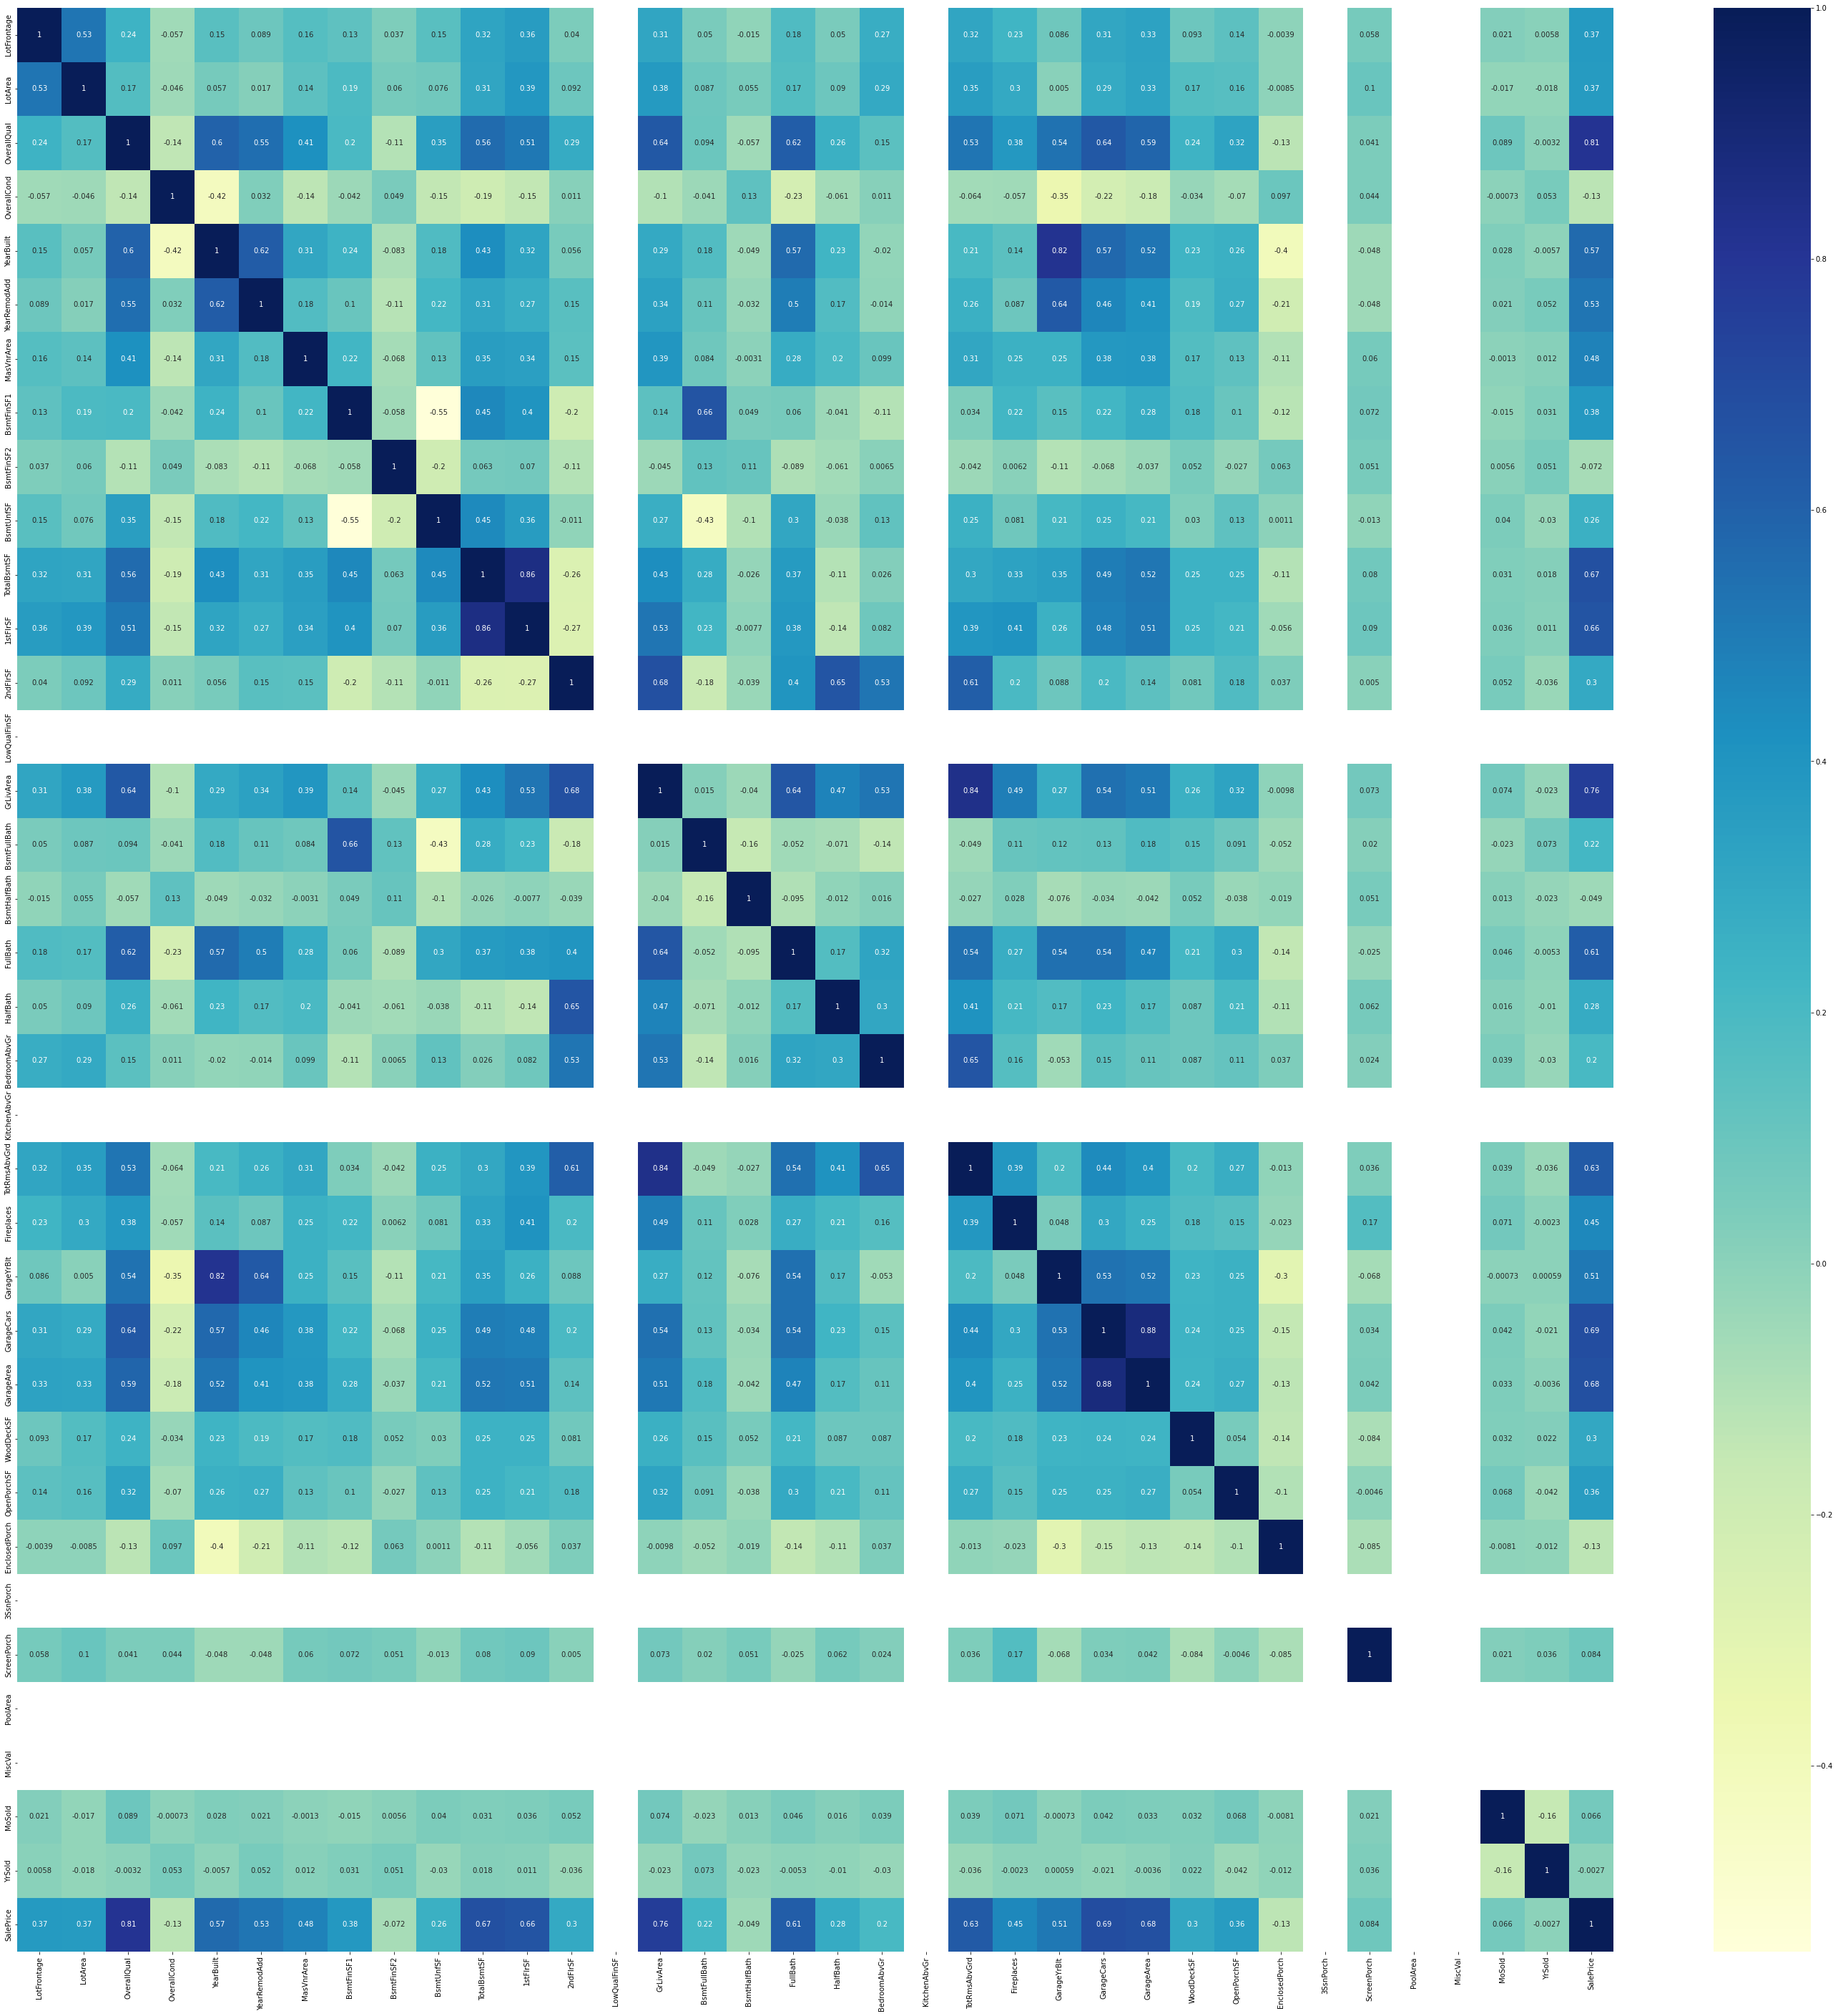

In [15]:
plt.figure(figsize = (50, 50))
sns.heatmap(data_numeric.corr(), annot = True, cmap="YlGnBu")
plt.show()

According to the correlation heatmap, following variables are selected
* YearBuilt
* MasVnrArea
* TotalBsmtSF
* Fireplaces

Although there are many high correlated variables, they also corrlate each other. For example, OverallQual highly correlates with SalePrice, it also correlates with other variables. Adding those variable may cause multicollinearity. 

#### Categorical variables

In [16]:
## Since we exclude column MSSubClass from numeric dataset, now it's needed to add again.
categorical_data = data_v2.select_dtypes(include=['object'])

## adding new column MSSubClass from raw_data
categorical_data['MSSubClass'] = raw_data['MSSubClass']

## casting that variable from int64 to object
categorical_data['MSSubClass'] = categorical_data['MSSubClass'].astype('object')

categorical_data

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,MSSubClass
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,60
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,20
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,60
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,70
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Abnorml,20
1454,FV,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,20
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,60
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal,20


In [17]:
## creating dummy variables

categorical_dummies = pd.get_dummies(categorical_data, drop_first=True)
categorical_dummies

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,

#### Consolidating to new dataset

In [18]:
final_data = pd.concat([data_numeric, categorical_dummies], axis=1)

# Training model
## Rescaling variables

Normalisation method is apply to rescale variables. Because during last assignment, I tried both normalisation and standardisation, the normalisation gave better result. Because normalisation is also known as min-max scaler. The maximum values will be scaled to 1, and the minimum values will be scaled to 0. Hence, normalisation method won't affect dummy varibles, we can just scale them all.

In [19]:
scaler = MinMaxScaler()

## variable contains all columns names
cols = final_data.columns

## creating new variables to reserve final data
scaled_data = final_data

scaled_data[cols] = scaler.fit_transform(final_data[cols])

scaled_data

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,0.273292,0.203125,0.666667,0.500,0.948148,0.883333,0.173605,0.322669,0.000000,0.064212,0.266999,0.180373,0.469747,0.0,0.435581,0.5,0.0,0.666667,0.5,0.500000,0.0,0.6,0.000000,0.932692,0.50,0.394245,0.000000,0.167582,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.300495,0.0,0.0,1.0,0.0,1.0,0.0,0.0,

## Spliting data to train and test set

In [20]:
## seperating independent and dependent variables

X = scaled_data.loc[:, scaled_data.columns!='SalePrice']  ## independent variables, aka predictors
y = scaled_data['SalePrice'] ## dependent variable

In [21]:
np.random.seed(1208) ## it's my favorite to use current date as seed :D

X_train, X_test, y_train, y_test = train_test_split(X
                                                    , y
                                                    , train_size=0.7
                                                    , test_size = 0.3
                                                    , random_state=100
                                                   )

Let's check if the size of train and test dataset are 70% and 30%

In [22]:
print("Size of X_train is: ", len(X_train))
print("Size of y_train is: ", len(y_train))

print("Size of X_test is: ", len(X_test))
print("Size of y_test is: ", len(y_test))

Size of X_train is:  886
Size of y_train is:  886
Size of X_test is:  380
Size of y_test is:  380


It seems the split work well


## Building model without using regularisation

In [23]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [24]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-36851583898.94778
[ 2.45439010e-02  5.24341417e-02  6.86917454e-02  7.91356270e-02
  6.76947049e-02  1.47845475e-02  2.64531320e-02 -2.69752916e+10
 -1.19835391e+10 -2.87999457e+10  3.95259529e+10  2.27038798e+10
  1.42624926e+10 -1.48971622e+10 -2.47828460e+10 -5.75900078e-03
 -1.87423825e-03  1.67475939e-02  1.38945580e-02 -3.10182571e-02
 -1.19864285e+10  2.93059349e-02  1.00899935e-02 -1.39656067e-02
  1.75495744e-02  5.44397235e-02  8.45527649e-03  1.49275064e-02
  2.12323666e-02  7.02892971e+09  3.25567722e-02 -5.03540610e+09
  1.51485230e+09 -3.14539671e-03 -9.13858414e-04  3.80142331e-02
  5.04340827e-02  3.89170647e-02  2.64239311e-02 -5.96035719e-02
  1.11367702e-02 -8.69560242e-03  4.57620621e-03  1.49647444e-02
 -4.05672193e-03  6.54375553e-03 -1.14583030e-01  9.03320312e-03
 -1.81818008e-02 -1.02382898e-03 -5.03063202e-03  1.55806541e-03
 -4.50060368e-02  2.83788443e-02  1.94836855e-02  4.74262238e-03
 -9.70357656e-03 -7.26175308e-03  2.96761990e-02 -2.35942602e-02
 -1.16

In [25]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9503759464131407
-2.6005123632229417e+20
0.7715580347346092
1.6474214414052064e+21
0.0008708329963144572
4.33531958264528e+18


## Ridge Regression

In [26]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [27]:
print(model_cv.best_params_)

{'alpha': 3.0}


In [74]:
alpha = 3 * 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.59245317e-02  2.01377401e-02  4.33388369e-02  1.40623909e-02
  8.98156890e-03  2.42448840e-02  3.03698764e-02  3.71623337e-02
  5.18828465e-04  2.38944669e-02  4.29298073e-02  4.89721594e-02
  2.39382333e-02  0.00000000e+00  5.86404361e-02  1.00523465e-02
 -4.72066650e-04  2.73948487e-02  1.89334092e-02  9.68258831e-03
  0.00000000e+00  4.25511965e-02  3.36471546e-02 -1.23764674e-05
  3.30185916e-02  3.46976206e-02  1.00971916e-02  1.70234304e-02
  7.39487911e-03  0.00000000e+00  1.11958192e-02  0.00000000e+00
  0.00000000e+00  1.53291602e-03  1.99664359e-03  3.88343397e-03
 -7.02102753e-05  1.07792668e-02 -1.15548689e-02 -6.90539719e-06
  5.66619201e-03 -2.87558074e-04 -2.74749187e-03  5.79035912e-03
 -2.43354597e-03  1.19273253e-03 -1.88481913e-03  1.03948303e-02
 -1.06288657e-02 -2.06876960e-03 -4.87363066e-03  5.32027957e-03
 -3.98726489e-03  1.12118422e-03  3.01558684e-03  9.21121142e-04
 -2.23629870e-03 -1.35522753e-02  1.95858823e-02 -1.49062616e-02
 -2.23111033e-02 -2.92210

In [75]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9071715239640517
0.8803986239545837
1.4433032241580361
0.7576732727953359
0.001629010411013585
0.0019938770336719366


## Lasso

In [56]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [31]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [115]:
## even the best alpha proposed is 0.0001, I tried to increase alpha 10 times, 
## the R-squared only slightly decrease 4%, while number of features decrease siginifcantly. 
## In my point of view, predictive model should use less as less variable as posible while we still maintain R-squared and MSE.
## Therefoe, I decide the alpha is 0.001

alpha =0.0001 * 10

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [116]:
lasso.coef_

array([ 0.        ,  0.        ,  0.11705301,  0.        ,  0.        ,
        0.02953642,  0.01872045,  0.05675837, -0.        ,  0.        ,
        0.09100249,  0.00121703,  0.        ,  0.        ,  0.31189745,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.00412421,  0.02117072,  0.        ,  0.02985609,
        0.03486592,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.02195301,  0.        ,
        0.        , -0.        , -0.00380129,  0.        ,  0.        ,
       -0.        , -0.        ,  0.00101415, -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.00146122, -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.00659673,  0.02507356, -0.  

In [117]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9009256451350642
0.8801913474885765
1.5404145571943215
0.7589863667041674
0.0017386168817091665
0.0019973325439583355


## Comparing all models in full

In [118]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.503759e-01,0.907172,0.900926
1,R2 Score (Test),-2.600512e+20,0.880399,0.880191
2,RSS (Train),7.715580e-01,1.443303,1.540415
3,RSS (Test),1.647421e+21,0.757673,0.758986
4,MSE (Train),2.950988e-02,0.040361,0.041697
5,MSE (Test),2.082143e+09,0.044653,0.044692


In [119]:
betas = pd.DataFrame(index=X.columns)

betas.rows = X.columns

betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [120]:
print("Number of Normal Linear regression variables:", len(betas['Linear'][betas['Linear'] != 0]))
print("Number of Ridge regression variables:", len(betas['Ridge'][betas['Ridge'] != 0]))
print("Number of Lasso regression variables:", len(betas['Lasso'][betas['Lasso'] != 0]))

Number of Normal Linear regression variables: 233
Number of Ridge regression variables: 221
Number of Lasso regression variables: 38


# Model evaluation

According to all three methods, we can see the Lasso Regression give better methods because of following reasons:
* it has the least number of variables. In fact, its number of other models' variables are doubled compared to Lasso regression.
* R2-squared of Lasso is about as equal as Ridge's, while its is weight much more than normal Linear

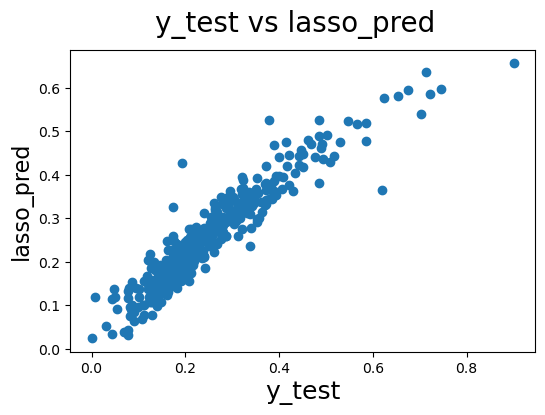

In [121]:
lasso_pred = lasso.predict(X_test)

# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

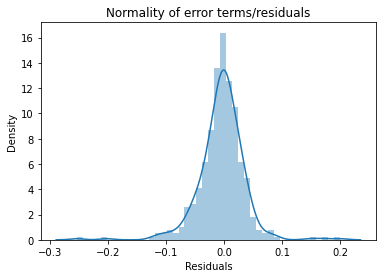

In [103]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

We can see the residual is normal distribution, and the mean is about at 0. To be double ensure, let's have a look at Q-Q plot

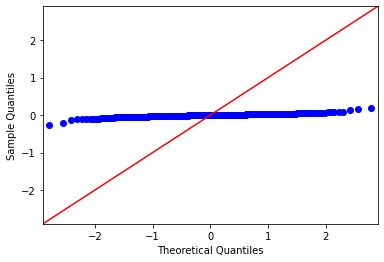

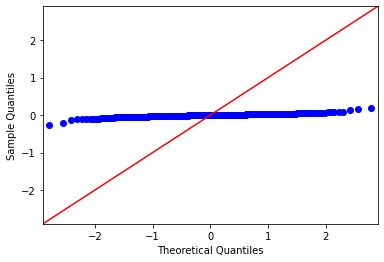

In [104]:
sm.qqplot(y_res, line ='45')

# The final model

The intercept is

In [105]:
lasso.intercept_

-0.0662366397064642

The list of coeficients are:

In [122]:
betas['Lasso'][betas['Lasso'] != 0]

OverallQual             0.117053
YearRemodAdd            0.029536
MasVnrArea              0.018720
BsmtFinSF1              0.056758
TotalBsmtSF             0.091002
1stFlrSF                0.001217
GrLivArea               0.311897
TotRmsAbvGrd            0.004124
Fireplaces              0.021171
GarageCars              0.029856
GarageArea              0.034866
MSZoning_RM            -0.021953
LotShape_Reg           -0.003801
LotConfig_CulDSac       0.001014
Neighborhood_Crawfor    0.001461
Neighborhood_NoRidge    0.006597
Neighborhood_NridgHt    0.025074
Condition1_Norm         0.007909
RoofStyle_Hip           0.010703
Exterior2nd_VinylSd     0.002701
MasVnrType_Stone        0.002508
ExterQual_Gd           -0.003355
ExterQual_TA           -0.026100
Foundation_PConc        0.008586
BsmtQual_Gd            -0.021680
BsmtQual_TA            -0.013577
BsmtCond_TA             0.003898
BsmtExposure_Gd         0.019810
BsmtExposure_No        -0.009043
BsmtFinType1_GLQ        0.008179
KitchenQua